# **Insurance Premium Prediction Project**

# **Milestone 1: Data Preparation & Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**Load training and testing datasets**

In [ ]:
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

In [ ]:
test_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [ ]:
train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


**Merge training and testing datasets**

In [ ]:
merged_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

merged_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Age                   float64
 2   Gender                object 
 3   Annual Income         float64
 4   Marital Status        object 
 5   Number of Dependents  float64
 6   Education Level       object 
 7   Occupation            object 
 8   Health Score          float64
 9   Location              object 
 10  Policy Type           object 
 11  Previous Claims       float64
 12  Vehicle Age           float64
 13  Credit Score          float64
 14  Insurance Duration    float64
 15  Policy Start Date     object 
 16  Customer Feedback     object 
 17  Smoking Status        object 
 18  Exercise Frequency    object 
 19  Property Type         object 
 20  Premium Amount        float64
dtypes: float64(9), int64(1), object(11)
memory usage: 320.4+ MB


**Custom imputation strategies for missing values**

In [ ]:
# Find null values in dataset
merged_data.isnull().sum()

,0
id,0
Age,31194
Gender,0
Annual Income,74809
Marital Status,30865
Number of Dependents,182802
Education Level,0
Occupation,597200
Health Score,123525
Location,0


In [ ]:
# Adjust Age Feature: Replace w/ Median
merged_data['Age'] = merged_data['Age'].fillna(merged_data['Age'].median())

# Adjust Annual Income Feature w/ Median
merged_data['Annual Income'] = merged_data['Annual Income'].fillna(merged_data['Annual Income'].median())

# Adjust Martial Status Feature w/ Mode
merged_data['Marital Status'] = merged_data['Marital Status'].fillna(
    merged_data['Marital Status'].mode()[0]
)

# Adjust Number of Dependents Feature w/ Median
merged_data['Number of Dependents'] = merged_data['Number of Dependents'].fillna(
    merged_data['Number of Dependents'].median()
)

# Adjust Occupation Feature w/ Mode Based on Education
merged_data['Occupation'] = merged_data.groupby('Education Level')['Occupation'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# Adjust Health Score Feature w/ Median
merged_data['Health Score'] = merged_data['Health Score'].fillna(merged_data['Health Score'].median())

# Adjust Previous Claims Feature w/ 0 (b/c missing likely means no priors)
merged_data['Previous Claims'] = merged_data['Previous Claims'].fillna(0)

# Adjust Vehicle Age w/ Median
merged_data['Vehicle Age'] = merged_data['Vehicle Age'].fillna(merged_data['Vehicle Age'].median())

# Adjust Credit Score Feature w/ Median Based on Education Level
merged_data['Credit Score'] = merged_data.groupby('Education Level')['Credit Score'].transform(
    lambda x: x.fillna(x.median())
)

# Adjust Insurance Duration w/ Median
merged_data['Insurance Duration'] = merged_data['Insurance Duration'].fillna(
    merged_data['Insurance Duration'].median()
)

# Adjust Customer Feedback Feature w/ Mode
merged_data['Customer Feedback'] = merged_data['Customer Feedback'].fillna(
    merged_data['Customer Feedback'].mode()[0]
)

In [ ]:
# Check if all null values cleared (except for Premium Amount)
merged_data.isnull().sum()

,0
id,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0


**Perform exploratory data analysis using different data visualizations**

In [ ]:
# Remove rows with missing Premium Amounts so EDA is done on complete data.
eda_data = merged_data[merged_data['Premium Amount'].notna()]

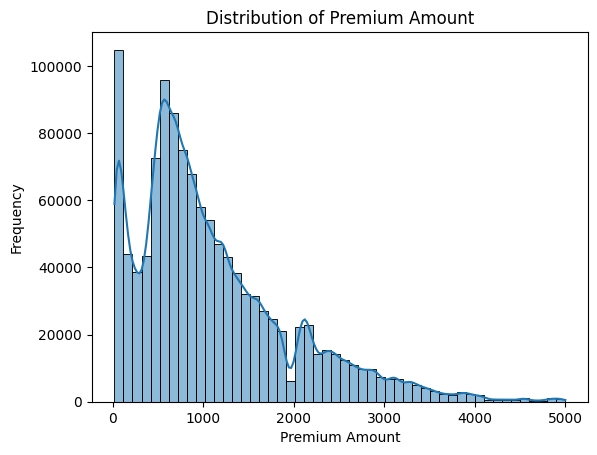

In [ ]:
# Show distribution of Premium Amounts to identify skewness and concentration.
sns.histplot(eda_data['Premium Amount'], bins=50, kde=True)
plt.title("Distribution of Premium Amount")
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.show()

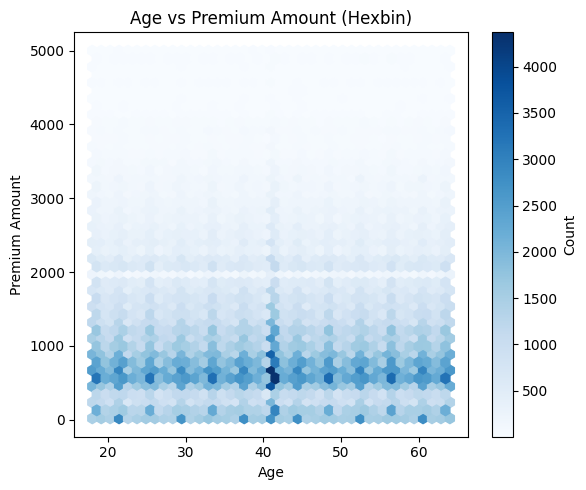

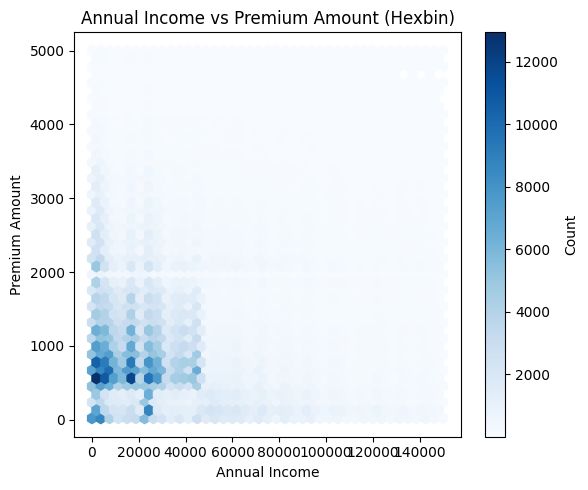

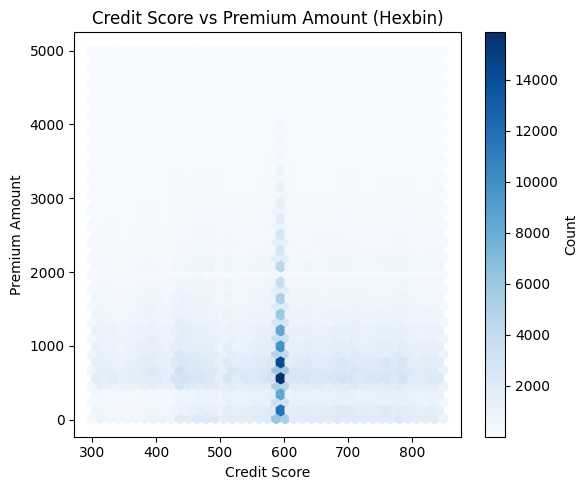

In [ ]:
# Use hexbin plots to see patterns between features and Premium Amount.

numeric_features = ['Age', 'Annual Income', 'Credit Score']

for feature in numeric_features:
    plt.figure(figsize=(6, 5))
    plt.hexbin(eda_data[feature], eda_data['Premium Amount'], gridsize=40, cmap='Blues', mincnt=1)
    plt.colorbar(label='Count')
    plt.title(f'{feature} vs Premium Amount (Hexbin)')
    plt.xlabel(feature)
    plt.ylabel('Premium Amount')
    plt.tight_layout()
    plt.show()

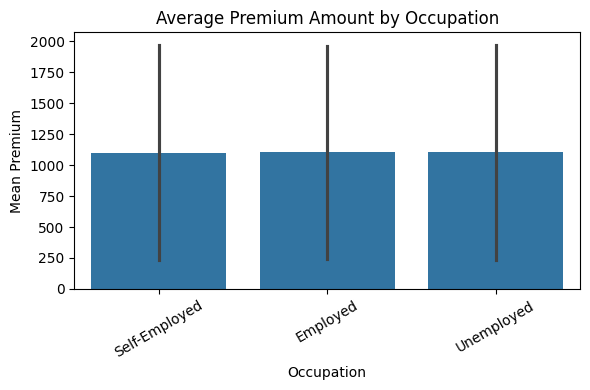

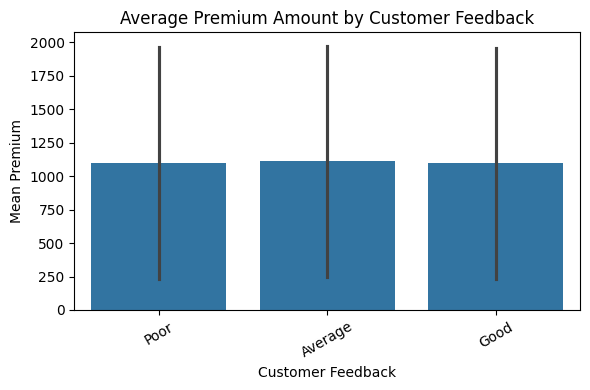

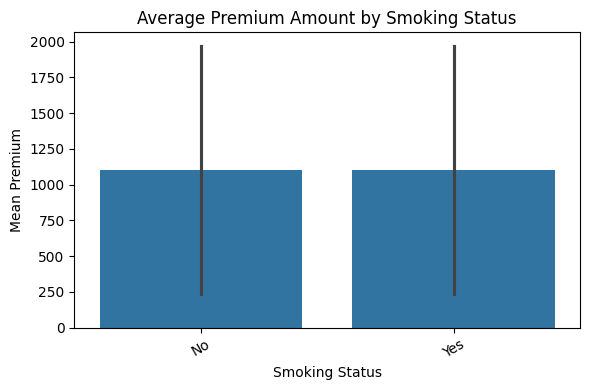

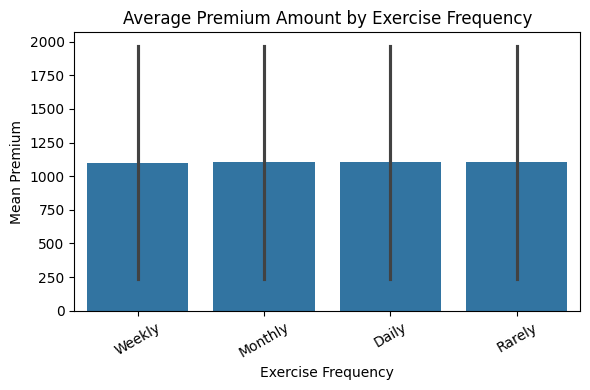

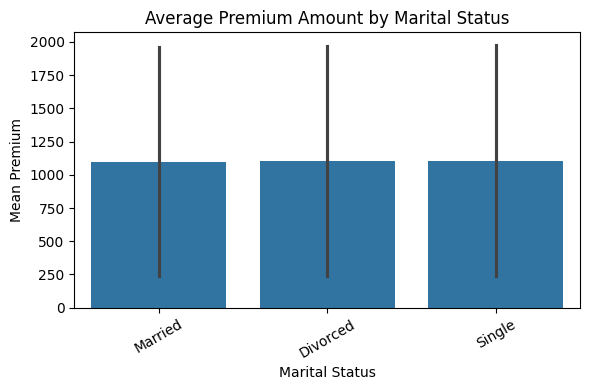

In [ ]:
# Bar plots show the mean Premium Amount for each category of selected categorical features.
# Error bars represent the standard deviation.

categorical_features = ['Occupation', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Marital Status']

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='Premium Amount', data=eda_data, estimator=np.mean, errorbar='sd')
    plt.title(f"Average Premium Amount by {col}")
    plt.ylabel("Mean Premium")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

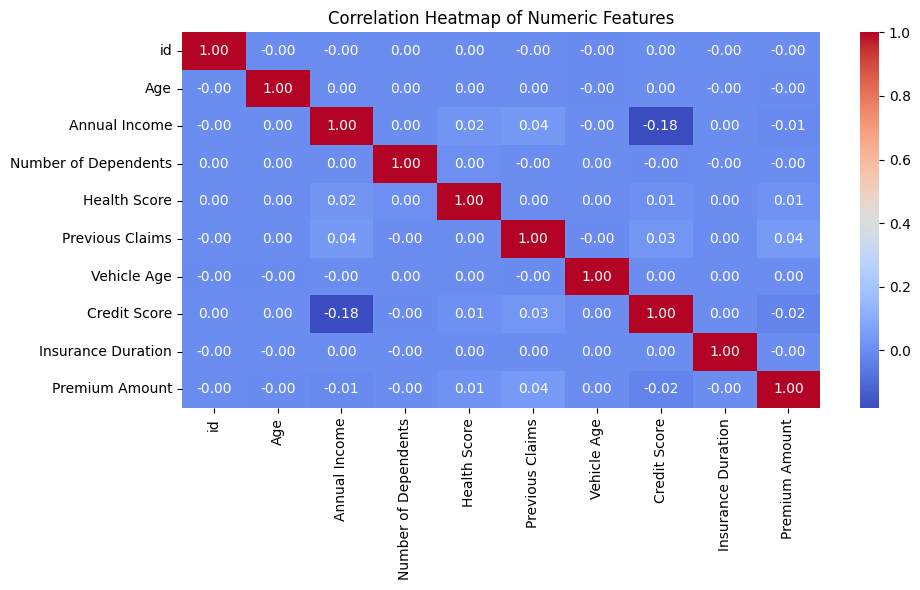

In [ ]:
# Heatmap shows correlations between all numeric features including Premium Amount
plt.figure(figsize=(10, 6))
sns.heatmap(eda_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

**Split the data into training and validation sets (80/20 ratio)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Filter rows where Premium Amount is not null, which will be the labeled training data
labeled_data = merged_data[merged_data['Premium Amount'].notna()].copy()

In [ ]:
# Define features (X) and target (y)
X = labeled_data.drop(columns=['Premium Amount'])
y = labeled_data['Premium Amount']

In [ ]:
# Split into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Milestone 2: Model Development & Tuning**

**Implement an advanced preprocessing pipeline:**

In [ ]:
# Binary encoding for gender and smoking status.
X_train['Gender'] = X_train['Gender'].map({'Female': 1, 'Male': 0})
X_test['Gender'] = X_test['Gender'].map({'Female': 1, 'Male': 0})

X_train['Smoking Status'] = X_train['Smoking Status'].map({'Yes': 1, 'No': 0})
X_test['Smoking Status'] = X_test['Smoking Status'].map({'Yes': 1, 'No': 0})

In [ ]:
# Ordinal and Target encoding for categorical variables.

# Marital Status
marital_order = {'Single': 0, 'Married': 1, 'Divorced': 2}
X_train['Marital Status'] = X_train['Marital Status'].map(marital_order)
X_test['Marital Status'] = X_test['Marital Status'].map(marital_order)

# Education Level
education_order = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
X_train['Education Level'] = X_train['Education Level'].map(education_order)
X_test['Education Level'] = X_test['Education Level'].map(education_order)

# Occupation
occupation_order = {'Unemployed': 0, 'Self-Employed': 1, 'Employed': 2}
X_train['Occupation'] = X_train['Occupation'].map(occupation_order)
X_test['Occupation'] = X_test['Occupation'].map(occupation_order)

# Location
location_order = {'Urban': 0, 'Suburban': 1, 'Rural': 2}
X_train['Location'] = X_train['Location'].map(location_order)
X_test['Location'] = X_test['Location'].map(location_order)

# Policy Type
policy_order = {'Basic': 0, 'Comprehensive': 1, 'Premium': 2}
X_train['Policy Type'] = X_train['Policy Type'].map(policy_order)
X_test['Policy Type'] = X_test['Policy Type'].map(policy_order)

# Customer Feedback
feedback_order = {'Poor': 0, 'Average': 1, 'Good': 2}
X_train['Customer Feedback'] = X_train['Customer Feedback'].map(feedback_order)
X_test['Customer Feedback'] = X_test['Customer Feedback'].map(feedback_order)

# Exercise Frequency
exercise_order = {'Rarely': 0, 'Daily': 1, 'Weekly': 2, 'Monthly': 3}
X_train['Exercise Frequency'] = X_train['Exercise Frequency'].map(exercise_order)
X_test['Exercise Frequency'] = X_test['Exercise Frequency'].map(exercise_order)

# Property Type
property_order = {'Condo': 0, 'Apartment': 1, 'House': 2}
X_train['Property Type'] = X_train['Property Type'].map(property_order)
X_test['Property Type'] = X_test['Property Type'].map(property_order)

In [ ]:
# Policy Start Date Encoding

# Convert to datetime
X_train['Policy Start Date'] = pd.to_datetime(X_train['Policy Start Date'])
X_test['Policy Start Date'] = pd.to_datetime(X_test['Policy Start Date'])

# Extract date parts
X_train['Policy Year'] = X_train['Policy Start Date'].dt.year
X_train['Policy Month'] = X_train['Policy Start Date'].dt.month
X_train['Policy DayOfWeek'] = X_train['Policy Start Date'].dt.dayofweek

X_test['Policy Year'] = X_test['Policy Start Date'].dt.year
X_test['Policy Month'] = X_test['Policy Start Date'].dt.month
X_test['Policy DayOfWeek'] = X_test['Policy Start Date'].dt.dayofweek

# Drop the original full timestamp column
X_train.drop(columns=['Policy Start Date'], inplace=True)
X_test.drop(columns=['Policy Start Date'], inplace=True)

In [ ]:
# Check Policy Start Date Encoding
X_train[['Policy Year', 'Policy Month', 'Policy DayOfWeek']].head()

,Policy Year,Policy Month,Policy DayOfWeek
404339,2024,8,6
748487,2020,6,5
435951,2021,2,4
311284,2022,11,4
318790,2021,1,4


In [ ]:
# Drop id
X_train.drop(columns=['id'], inplace=True)
X_test.drop(columns=['id'], inplace=True)

In [ ]:
# Check if data is ready for model
print("Non-numeric columns:", X_train.select_dtypes(exclude=[np.number]).columns.tolist())
print("Missing values in X_train:", X_train.isna().sum().sum())
print("Missing values in X_test:", X_test.isna().sum().sum())

Non-numeric columns: []
Missing values in X_train: 0
Missing values in X_test: 0


In [ ]:
# Check dataset size
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (960000, 21)
X_test shape: (240000, 21)


**Train a baseline regressor model. Evaluate model performance using RMSE.**

In [ ]:
# Implementing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Initialize the model

rf_model = RandomForestRegressor(
    n_estimators=50,        # Number of trees: Reasonable balance of speed and stability
    max_depth=15,           # Growth of trees: Controls tree size and RAM use
    min_samples_leaf=10,    # Prevents tiny overfitted splits
    random_state=42,        # Fixed randomness: Ensures reproducibility
    n_jobs=1                # Use 1 core to avoid RAM spikes
)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=50,
                      n_jobs=1, random_state=42)

In [ ]:
# Predict on validation set
y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print results
print(f"Baseline Random Forest Results:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")

Baseline Random Forest Results:
RMSE: 843.01
MAE: 637.34
R^2 Score: 0.0490


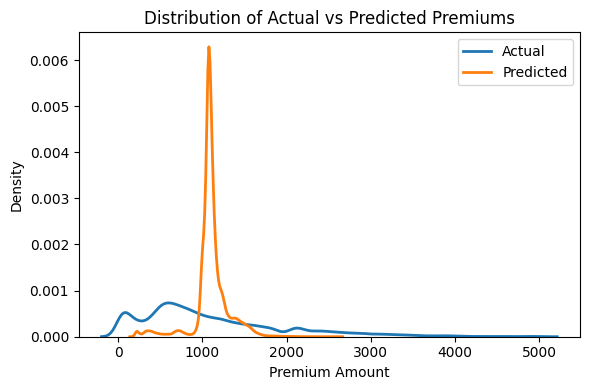

In [ ]:
# Predicted vs. Actual Plot
plt.figure(figsize=(6, 4))
sns.kdeplot(y_test, label='Actual', linewidth=2)
sns.kdeplot(y_pred, label='Predicted', linewidth=2)
plt.title("Distribution of Actual vs Predicted Premiums")
plt.xlabel("Premium Amount")
plt.legend()
plt.tight_layout()
plt.show()

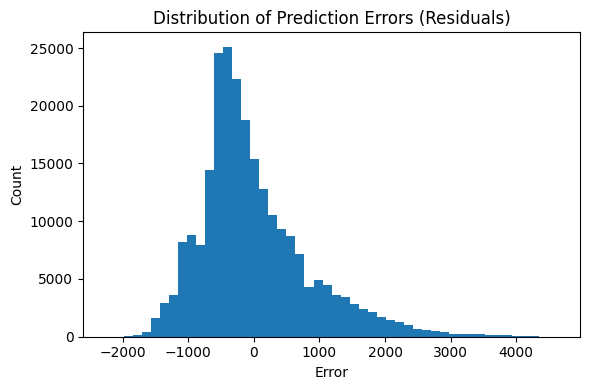

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=50)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# **Milestone 3: Kaggle Competition Submission**

In [ ]:
# Start from original test data
kaggle_test = test_data.drop(columns=['Premium Amount'], errors='ignore').copy()

# Convert to datetime
kaggle_test['Policy Start Date'] = pd.to_datetime(kaggle_test['Policy Start Date'])

# Extract date parts
kaggle_test['Policy Year'] = kaggle_test['Policy Start Date'].dt.year
kaggle_test['Policy Month'] = kaggle_test['Policy Start Date'].dt.month
kaggle_test['Policy DayOfWeek'] = kaggle_test['Policy Start Date'].dt.dayofweek

# Drop original date column
kaggle_test.drop(columns=['Policy Start Date'], inplace=True)

# Apply the same encoding as training
kaggle_test['Gender'] = kaggle_test['Gender'].map({'Female': 1, 'Male': 0})
kaggle_test['Smoking Status'] = kaggle_test['Smoking Status'].map({'Yes': 1, 'No': 0})

marital_order = {'Single': 0, 'Married': 1, 'Divorced': 2}
kaggle_test['Marital Status'] = kaggle_test['Marital Status'].map(marital_order)

education_order = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
kaggle_test['Education Level'] = kaggle_test['Education Level'].map(education_order)

occupation_order = {'Unemployed': 0, 'Self-Employed': 1, 'Employed': 2}
kaggle_test['Occupation'] = kaggle_test['Occupation'].map(occupation_order)

location_order = {'Urban': 0, 'Suburban': 1, 'Rural': 2}
kaggle_test['Location'] = kaggle_test['Location'].map(location_order)

policy_order = {'Basic': 0, 'Comprehensive': 1, 'Premium': 2}
kaggle_test['Policy Type'] = kaggle_test['Policy Type'].map(policy_order)

feedback_order = {'Poor': 0, 'Average': 1, 'Good': 2}
kaggle_test['Customer Feedback'] = kaggle_test['Customer Feedback'].map(feedback_order)

exercise_order = {'Rarely': 0, 'Daily': 1, 'Weekly': 2, 'Monthly': 3}
kaggle_test['Exercise Frequency'] = kaggle_test['Exercise Frequency'].map(exercise_order)

property_order = {'Condo': 0, 'Apartment': 1, 'House': 2}
kaggle_test['Property Type'] = kaggle_test['Property Type'].map(property_order)

# Reorder columns to match training features
kaggle_test = kaggle_test[X_train.columns]


In [ ]:
kaggle_test = kaggle_test[X_train.columns]

kaggle_predictions = rf_model.predict(kaggle_test)

submission = pd.DataFrame({
    'id': test_data['id'],
    'Premium Amount': np.round(kaggle_predictions, 3)
})

submission.to_csv('submission.csv', index=False)